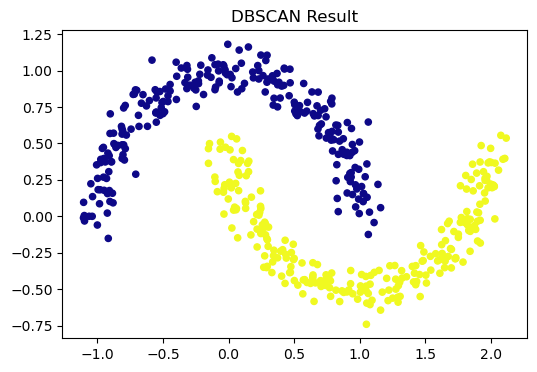

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Buat dataset
X, _ = make_moons(n_samples=500, noise=0.08, random_state=0)

# Jalankan DBSCAN
db = DBSCAN(eps=0.25, min_samples=5).fit(X)
labels = db.labels_

# Plot dengan warna otomatis (seperti contoh kamu sebelumnya)
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='plasma', s=20)   # <== INGAT PAKAI cmap=plasma
plt.title("DBSCAN Result")
plt.show()